### Bank Customer Analysis

### Problem Statement

The bank faces a high customer churn rate but lacks clarity on the causes. This analysis aims to uncover patterns in customer demographics, financial profiles, and engagement behaviors to identify key drivers and provide insights for improving retention strategies.

##### 1. Data Understanding/Exploration

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [88]:
# read in the data

cust_df = pd.read_csv('Datasets/Customer_Info.csv')
acct_df = pd.read_csv('Datasets/Account_Info.csv')

In [89]:
cust_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [90]:
cust_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [91]:
acct_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [92]:
acct_df.tail()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
9997,15569892,€57369.61,1,Yes,10,Yes,0
9998,15584532,€0.0,1,Yes,7,Yes,1
9999,15682355,€75075.31,2,No,3,No,1
10000,15628319,€130142.79,1,No,4,No,0
10001,15628319,€130142.79,1,No,4,No,0


In [93]:
# Merging the two datasets with a common key

comb_df = pd.merge(cust_df, acct_df, on='CustomerId')
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [94]:
comb_df.shape

(10004, 14)

In [95]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [96]:
# Checking for duplicates

comb_df.duplicated().sum()

4

In [97]:
# Checking for nulls/missing values

comb_df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure_x           0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_y           0
IsActiveMember     0
Exited             0
dtype: int64

In [98]:
# Removing duplicates

comb_df.drop_duplicates(ignore_index = True, inplace=True)
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9995,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,5,No,0
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,10,Yes,0
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,7,Yes,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [99]:
# Removing nulls/missing values

comb_df.dropna(axis=0, ignore_index=True, inplace=True)
comb_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9992,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,5,No,0
9993,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,10,Yes,0
9994,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,7,Yes,1
9995,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
9996,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


In [100]:
# Removing duplicate column

comb_df.drop('Tenure_x', axis=1, inplace=True)
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,€79084.1,€125510.82,1,Yes,2,Yes,0


In [101]:
## Renaming column

comb_df.rename(columns={'Tenure_y': 'Tenure'}, inplace=True)
comb_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,€79084.1,€125510.82,1,Yes,2,Yes,0
5,15574012,Chu,645,Spain,Male,44.0,€149756.71,€113755.78,2,No,8,No,1
6,15592531,Bartlett,822,France,Male,50.0,€10062.8,€0.0,2,Yes,7,Yes,0
7,15656148,Obinna,376,Germany,Female,29.0,€119346.88,€115046.74,4,No,4,No,1
8,15792365,He,501,French,Male,44.0,€74940.5,€142051.07,2,Yes,4,Yes,0
9,15592389,H?,684,France,Male,27.0,€71725.73,€134603.88,1,Yes,2,Yes,0


In [102]:
# Replacing values

comb_df['Geography'] = comb_df['Geography'].replace({'FRA': 'France', 'French': 'France'})
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,France,Female,42.0,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,France,Female,39.0,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,€79084.1,€125510.82,1,Yes,2,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,Obijiaku,771,France,Male,39.0,€96270.64,€0.0,2,No,5,No,0
9993,15569892,Johnstone,516,France,Male,35.0,€101699.77,€57369.61,1,Yes,10,Yes,0
9994,15584532,Liu,709,France,Female,36.0,€42085.58,€0.0,1,Yes,7,Yes,1
9995,15682355,Sabbatini,772,Germany,Male,42.0,€92888.52,€75075.31,2,No,3,No,1


In [103]:
import re
comb_df['Surname'] = [name.replace('?', '') for name in comb_df['Surname']]
comb_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,€112542.58,€83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,France,Female,42.0,€113931.57,€159660.8,3,No,8,No,1
3,15701354,Boni,699,France,Female,39.0,€93826.63,€0.0,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,€79084.1,€125510.82,1,Yes,2,Yes,0
5,15574012,Chu,645,Spain,Male,44.0,€149756.71,€113755.78,2,No,8,No,1
6,15592531,Bartlett,822,France,Male,50.0,€10062.8,€0.0,2,Yes,7,Yes,0
7,15656148,Obinna,376,Germany,Female,29.0,€119346.88,€115046.74,4,No,4,No,1
8,15792365,He,501,France,Male,44.0,€74940.5,€142051.07,2,Yes,4,Yes,0
9,15592389,H,684,France,Male,27.0,€71725.73,€134603.88,1,Yes,2,Yes,0


In [104]:
comb_df.shape

(9997, 13)

##### The no of rows & columns of the merged dataset before cleaning:
- rows - 10004
- columns - 14 
##### After cleaning 
- rows - 9997
- columns - 13

Cleaning - 4 duplicates found and removed, 3 null rows removed, 1 column removed

In [105]:
# Handling special characters in aggregate columns

comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].str.replace('€','').astype(float)

comb_df['Balance'] = comb_df['Balance'].str.replace('€','').astype(float)

In [106]:
comb_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
2,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1
3,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0


In [107]:
# Converting CustomerId column from measure to a dimension

comb_df['CustomerId'] = comb_df['CustomerId'].astype(str)

In [108]:
measures = [i for i in comb_df.select_dtypes(include=['int64', 'float64']).columns]

dimensions = [i for i in comb_df.select_dtypes(include=['object']).columns]

In [109]:
measures

['CreditScore',
 'Age',
 'EstimatedSalary',
 'Balance',
 'NumOfProducts',
 'Tenure',
 'Exited']

In [110]:
dimensions

['CustomerId', 'Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [111]:
## Export clean data

comb_df.to_csv('Cleaned_BankChurn_data.csv')

## Data Analysis

### 1. Demographic Analysis

- Distribution of customers based on Geography, Gender and Age


In [112]:
def draw_hist(df, col):
    plt.hist(df[col], color='lightblue', edgecolor='grey')
    plt.title(f'Distribution of customers based on {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

def draw_count_plot(df, col):
    sb.countplot(y=col, data=df, palette='Greys_r')
    plt.title(f'Countplot of {col}')
    plt.show()

In [113]:
comb_df.groupby('Geography')[['CustomerId']].count()
result = comb_df.groupby('Geography')[['CustomerId']].count()
result = result.sort_values(by='CustomerId', ascending=False)
result

,CustomerId
Geography,
France,5013
Germany,2508
Spain,2476


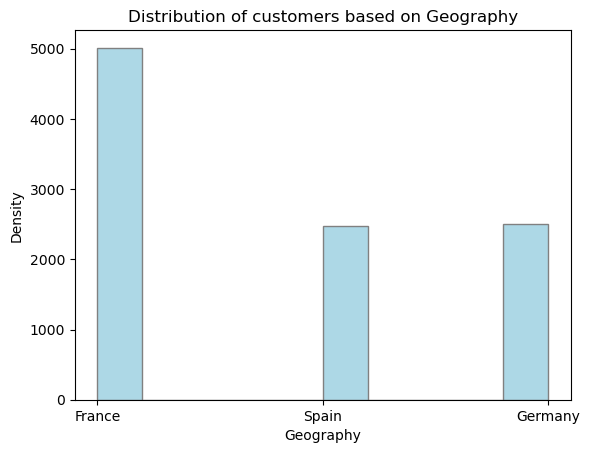

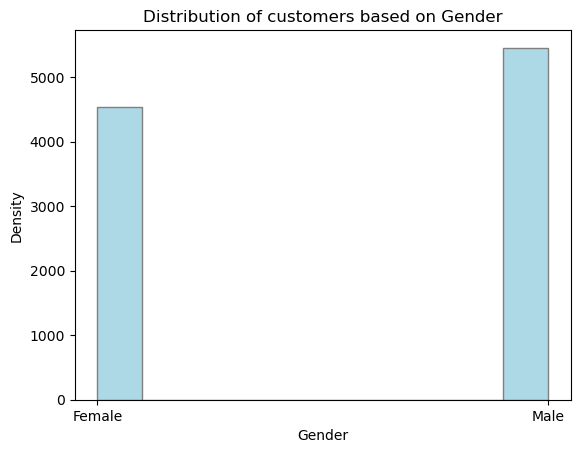

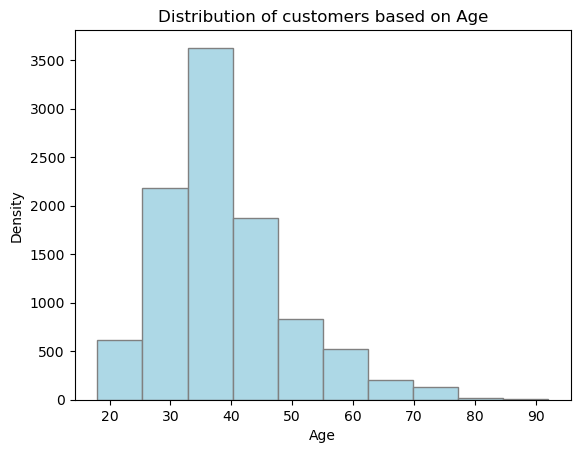

In [114]:
for column in ['Geography', 'Gender', 'Age']:
    draw_hist(comb_df, column)

#### From the distribution
- Geographically, France had the highest representation, comprising around 50% of the total population.
- By gender, males were more prevalent than females.
- Age-wise, the majority of customers were between 30 and 40 years old, while those aged 70 and above had the lowest representation.

##### Demographic segments (by geography)

In [115]:
result = comb_df.groupby(['Geography'])[['CreditScore']].mean()
result = result.sort_values(by='CreditScore', ascending=False)
result

,CreditScore
Geography,
Germany,651.484450
Spain,651.324717
France,649.690604


In [116]:
# generate bar plot

plt.figure(figsize=(6, 5))

def generate_bar_plot(x, y, xlabel, ylabel):
    plt.bar(x, y, color='lightblue', edgecolor='grey')
    plt.title(f'Plot of {ylabel} by {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

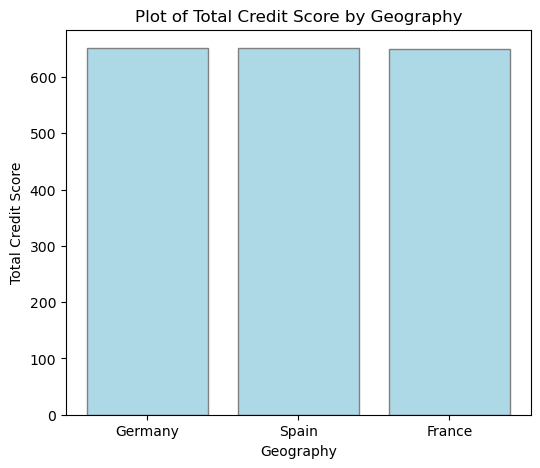

In [117]:
generate_bar_plot(result.index, result['CreditScore'], 'Geography', 'Total Credit Score')

- The plot indicates that credit scores are evenly distributed across the regions on average

In [118]:
result = comb_df.groupby('Geography')[['Balance']].mean()
result = result.sort_values(by='Balance', ascending=False)
result

,Balance
Geography,
Germany,119721.495993
France,62105.022839
Spain,61794.571321


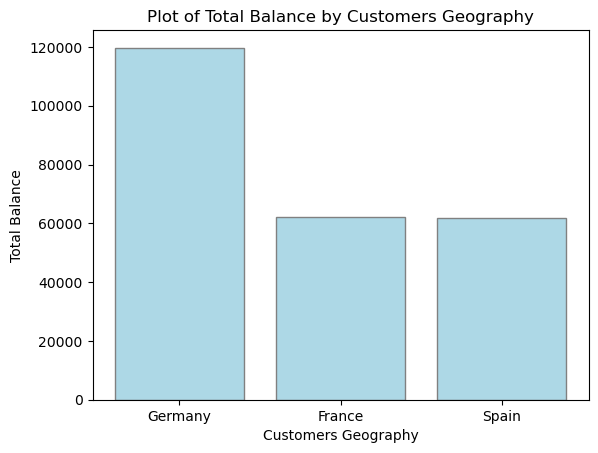

In [119]:
generate_bar_plot(result.index, result['Balance'], 'Customers Geography', 'Total Balance')

- The plot shows that Germany has the highest average total balance among all regions

#### 2. Customer Engagement Patterns

- Tenure vs Has Credit Card

In [120]:
comb_hasCrCard = comb_df[comb_df['HasCrCard'] == 'Yes']
comb_hasCrCard = comb_hasCrCard.groupby(by=['Tenure'])['HasCrCard'].count()

In [121]:
comb_hasCrCard

Tenure
0     219
1     569
2     559
3     523
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: HasCrCard, dtype: int64

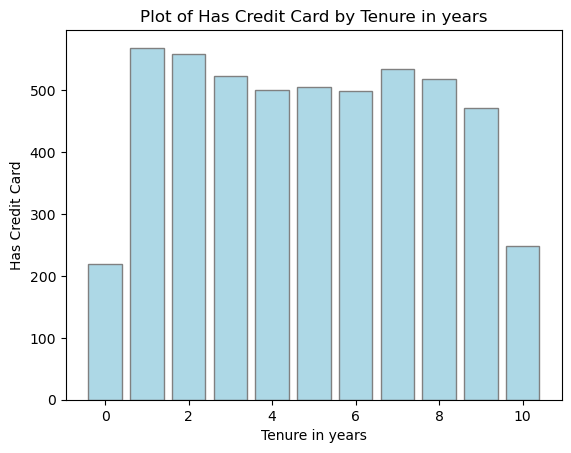

In [122]:
generate_bar_plot(comb_hasCrCard.index, comb_hasCrCard, 'Tenure in years', 'Has Credit Card')

The plot shows that customers with a tenure of 1 owns the most credit cards, followed by those with tenures 2 and 7

- Tenure vs Is Active Member

In [123]:
active = comb_df[comb_df['IsActiveMember'] == 'Yes']
active = active.groupby(by=['Tenure'])['IsActiveMember'].count()
active

Tenure
0     219
1     569
2     559
3     523
4     500
5     506
6     499
7     535
8     519
9     471
10    249
Name: IsActiveMember, dtype: int64

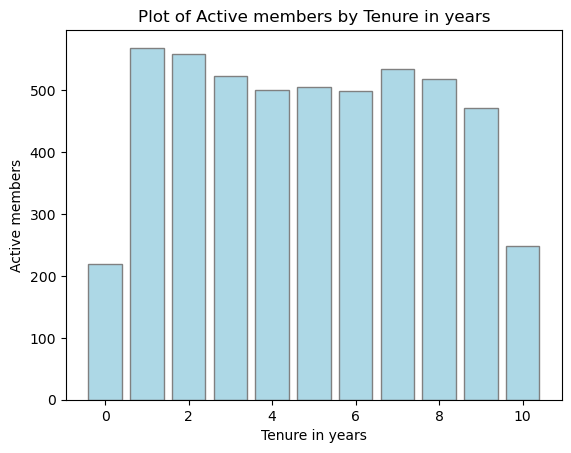

In [124]:
generate_bar_plot(active.index, active, 'Tenure in years', 'Active members')

The plot shows that customers with a tenure of 1 are the most active, followed by those with tenures of 2 and 7. This suggests that customer activity levels are not directly tied to how long they’ve been with the bank

- #### The Impact of tenure on customers behavior

In [125]:
def generate_line_chart(x, y, xlabel,ylabel,data,color='lightblue',estimator=sum):
    sb.lineplot(x=x,y=y,markers=True, dashes=False, data=data,estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of {ylabel} with changes in {xlabel}')
    plt.show()

In [126]:
tenure_bal = comb_df.groupby('Tenure')[['Balance']].sum()
tenure_bal = tenure_bal.sort_values(by='Balance', ascending=False)
tenure_bal

,Balance
Tenure,
1,81304822.67
2,80527928.54
8,79885013.21
3,78225722.99
7,77667080.19
5,77361612.23
9,75337543.31
4,73244740.73
6,71828419.11


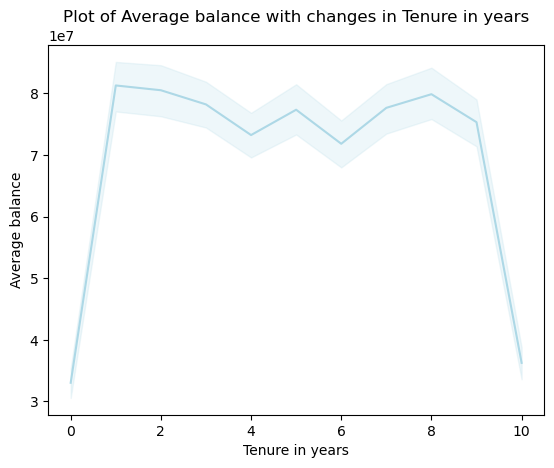

In [127]:
generate_line_chart(x='Tenure', y ='Balance', xlabel='Tenure in years',ylabel='Average balance', data=comb_df.sort_values(by='Tenure'))

The results show that customers with a 1-year tenure have the highest average balance, followed by a rise and fall up to tenure 10. This indicates that while some long-tenured customers have higher balances, others do not. Overall, tenure does not appear to have a significant impact on customer balances

In [128]:
tenure_pro = comb_df.groupby('Tenure')[['NumOfProducts']].sum()
tenure_pro = tenure_pro.sort_values(by='NumOfProducts', ascending=False)
tenure_pro

,NumOfProducts
Tenure,
2,1665
5,1573
7,1573
8,1561
3,1546
1,1542
9,1511
4,1500
6,1468


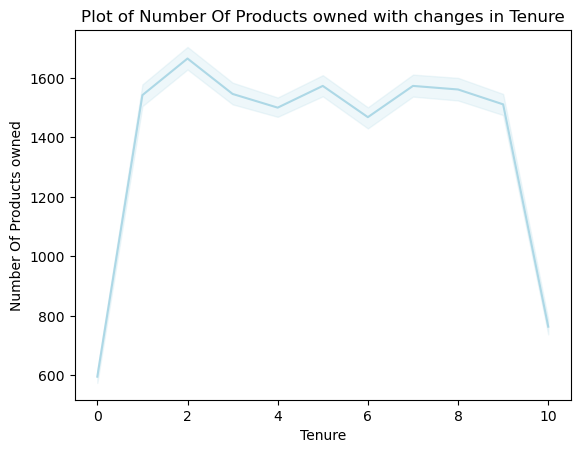

In [129]:
generate_line_chart(x='Tenure', y ='NumOfProducts', xlabel='Tenure',ylabel='Number Of Products owned', data=comb_df.sort_values(by='Tenure'))

Result:
- Customers with 2years tenure has the highest number of products
- Some longer-tenured customers have more products while some do not
- Tenure does not show significant impact in the number of products owned

#### 3. Financial Performance Analysis

- General distribution of customers credit score

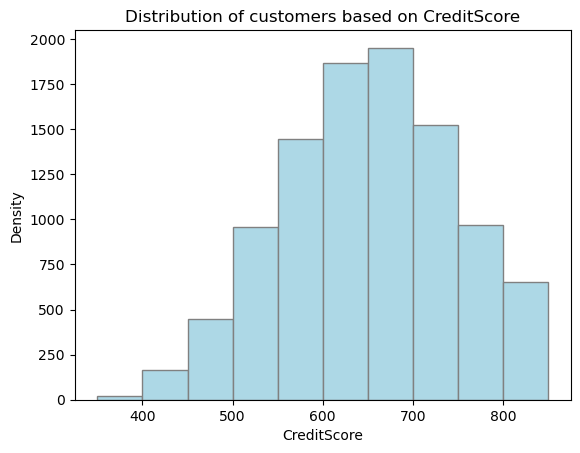

In [130]:
draw_hist(comb_df, 'CreditScore')

The result shows that most customers have credit scores in the range of 650 to 700, while only a few have low credit scores

In [131]:
## Credit Score Rating

def cs_rating(score):
    if score < 601:
        return 'Bad'
    elif score < 661:
        return 'Fair'
    elif score < 781:
        return 'Good'
    else:
        return 'Excellent'

comb_df['CreditScoreRating'] = comb_df['CreditScore'].apply(cs_rating)

In [132]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScoreRating
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1,Fair
1,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0,Fair
2,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1,Bad
3,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0,Good
4,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,Obijiaku,771,France,Male,39.0,96270.64,0.00,2,No,5,No,0,Good
9993,15569892,Johnstone,516,France,Male,35.0,101699.77,57369.61,1,Yes,10,Yes,0,Bad
9994,15584532,Liu,709,France,Female,36.0,42085.58,0.00,1,Yes,7,Yes,1,Good
9995,15682355,Sabbatini,772,Germany,Male,42.0,92888.52,75075.31,2,No,3,No,1,Good


In [133]:
cs_rate = comb_df.groupby('CreditScoreRating')[['CreditScore']].sum()
cs_rate = cs_rate.sort_values(by='CreditScore', ascending=False)
cs_rate

,CreditScore
CreditScoreRating,
Good,2638595
Bad,1647216
Fair,1440149
Excellent,777542


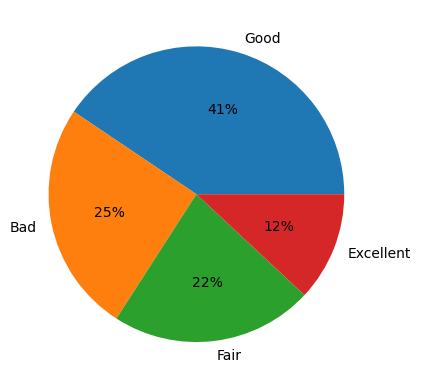

In [134]:
plt.pie(cs_rate['CreditScore'], labels=cs_rate.index, autopct='%.0f%%')
plt.show()

The analysis shows that a large number of customers have good credit scores, ranging from 661 to 780.
In contrast, only a small portion of customers have excellent credit scores between 781 and 850

 #### 3a. Credit Score Distribution across key segments like age, gender and geography

In [135]:
agg_data = comb_df.groupby(['Gender', 'CreditScoreRating'], as_index=False)['CreditScore'].count()

agg_data

,Gender,CreditScoreRating,CreditScore
0,Female,Bad,1380
1,Female,Excellent,435
2,Female,Fair,1037
3,Female,Good,1689
4,Male,Bad,1684
5,Male,Excellent,515
6,Male,Fair,1244
7,Male,Good,2013


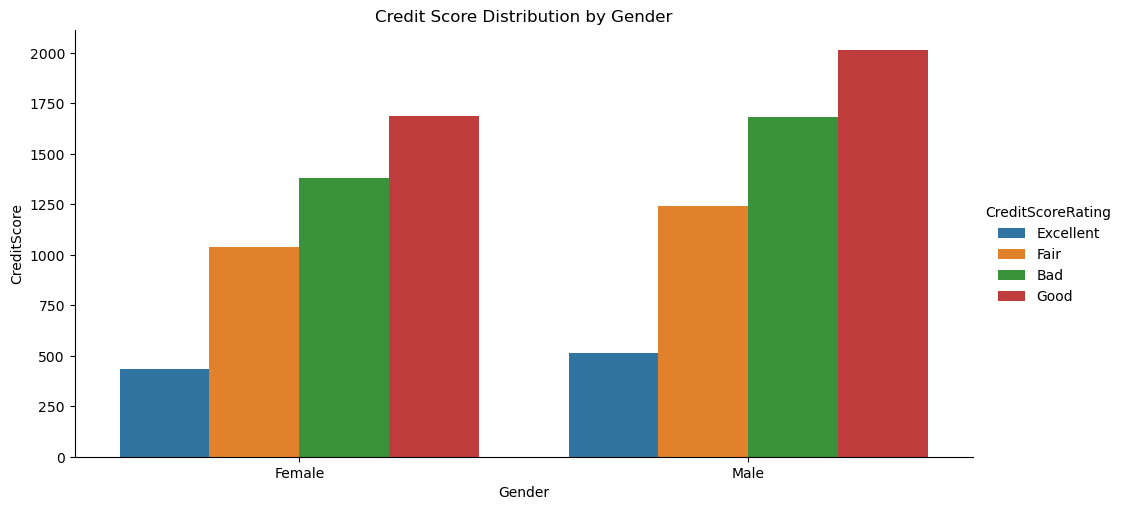

In [136]:
sb.catplot(x='Gender', y='CreditScore', hue='CreditScoreRating', kind='bar', data=agg_data.sort_values(by='CreditScore'), height=5, aspect=2)
plt.title('Credit Score Distribution by Gender')
plt.show()

Result:

Male customers have the highest credit scores across all four rating categories

In [137]:
agg_data = comb_df.groupby(['Geography', 'CreditScoreRating'], as_index=False)['CreditScore'].count()

agg_data

,Geography,CreditScoreRating,CreditScore
0,France,Bad,1550
1,France,Excellent,465
2,France,Fair,1108
3,France,Good,1890
4,Germany,Bad,767
5,Germany,Excellent,246
6,Germany,Fair,584
7,Germany,Good,911
8,Spain,Bad,747
9,Spain,Excellent,239


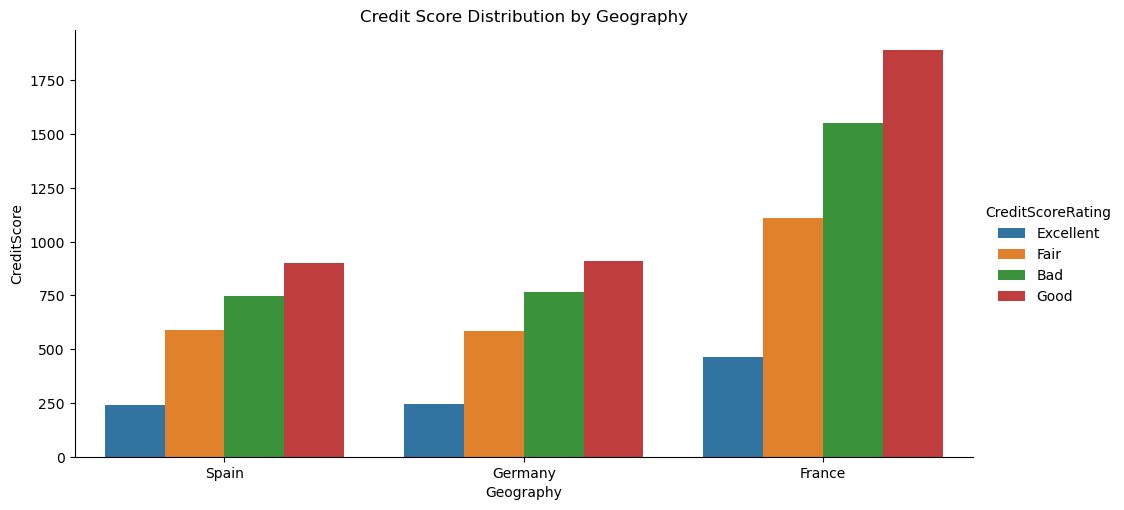

In [138]:
sb.catplot(x='Geography', y='CreditScore', hue='CreditScoreRating', kind='bar', data=agg_data.sort_values(by='CreditScore'), height=5, aspect=2)
plt.title('Credit Score Distribution by Geography')
plt.show()

France has the highest number of customers across all credit score ratings—good, fair, bad, and excellents as seen from the chart above

#### 3b. Customers balance VS Demographic Segments

##### Estimated Salary vs Demographic Groups(Geography/Gender)

In [139]:
def cust_pattern(value):
    if value > 100000:
        return 'High-Income Customer'
    elif value > 50000:
        return 'Average-Income Customer'
    elif value > 0:
        return 'Low-Income Customer'
    else:
        return 'Zero-Income Customer'

comb_df['SalaryRate'] = comb_df['EstimatedSalary'].apply(cust_pattern)

In [140]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScoreRating,SalaryRate
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1,Fair,High-Income Customer
1,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0,Fair,High-Income Customer
2,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1,Bad,High-Income Customer
3,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0,Good,Average-Income Customer
4,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0,Excellent,Average-Income Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,Obijiaku,771,France,Male,39.0,96270.64,0.00,2,No,5,No,0,Good,Average-Income Customer
9993,15569892,Johnstone,516,France,Male,35.0,101699.77,57369.61,1,Yes,10,Yes,0,Bad,High-Income Customer
9994,15584532,Liu,709,France,Female,36.0,42085.58,0.00,1,Yes,7,Yes,1,Good,Low-Income Customer
9995,15682355,Sabbatini,772,Germany,Male,42.0,92888.52,75075.31,2,No,3,No,1,Good,Average-Income Customer


In [141]:
sal_geo = comb_df.groupby(['Geography', 'SalaryRate'], as_index=False)['EstimatedSalary'].count()

sal_geo

,Geography,SalaryRate,EstimatedSalary
0,France,Average-Income Customer,1296
1,France,High-Income Customer,2495
2,France,Low-Income Customer,1222
3,Germany,Average-Income Customer,616
4,Germany,High-Income Customer,1276
5,Germany,Low-Income Customer,616
6,Spain,Average-Income Customer,624
7,Spain,High-Income Customer,1237
8,Spain,Low-Income Customer,615


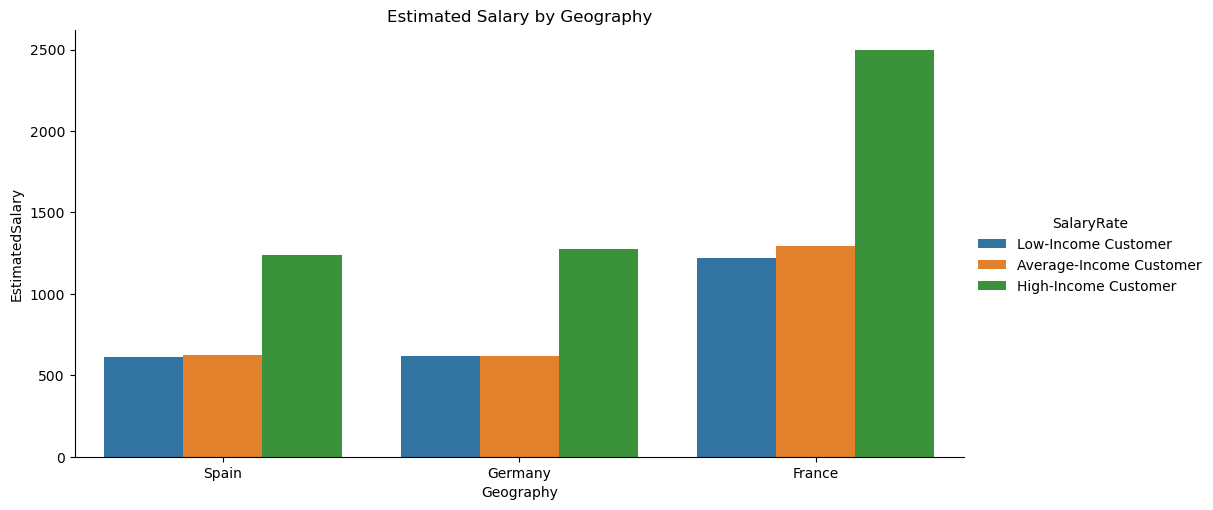

In [142]:
sb.catplot(x='Geography', y='EstimatedSalary', hue='SalaryRate', kind='bar', data=sal_geo.sort_values(by='EstimatedSalary'), height=5, aspect=2)
plt.title('Estimated Salary by Geography')
plt.show()

Result: High-income customers are mostly found in France

In [143]:
sal_geo = comb_df.groupby(['Gender', 'SalaryRate'], as_index=False)['EstimatedSalary'].count()

sal_geo

,Gender,SalaryRate,EstimatedSalary
0,Female,Average-Income Customer,1111
1,Female,High-Income Customer,2323
2,Female,Low-Income Customer,1107
3,Male,Average-Income Customer,1425
4,Male,High-Income Customer,2685
5,Male,Low-Income Customer,1346


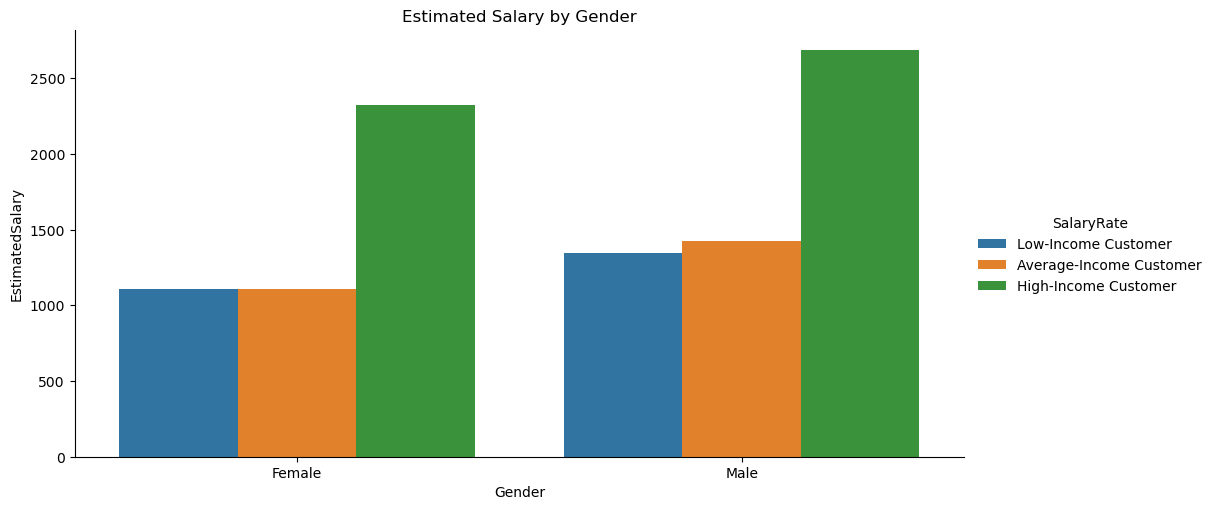

In [144]:
sb.catplot(x='Gender', y='EstimatedSalary', hue='SalaryRate', kind='bar', data=sal_geo.sort_values(by='EstimatedSalary'), height=5, aspect=2)
plt.title('Estimated Salary by Gender')
plt.show()

Result: The estimated salary of male customers is slightly higher compared to that of female customers

#### 4. Exited Customers

In [145]:
exit_cs = comb_df.groupby(['Geography', 'Exited'], as_index=False)['Balance'].mean()
exit_cs = exit_cs.sort_values(by='Balance', ascending=False)
exit_cs

,Geography,Exited,Balance
3,Germany,1,120361.075590
2,Germany,0,119414.165537
5,Spain,1,72513.352446
1,France,1,71192.795728
0,France,0,60353.631918
4,Spain,0,59648.736806


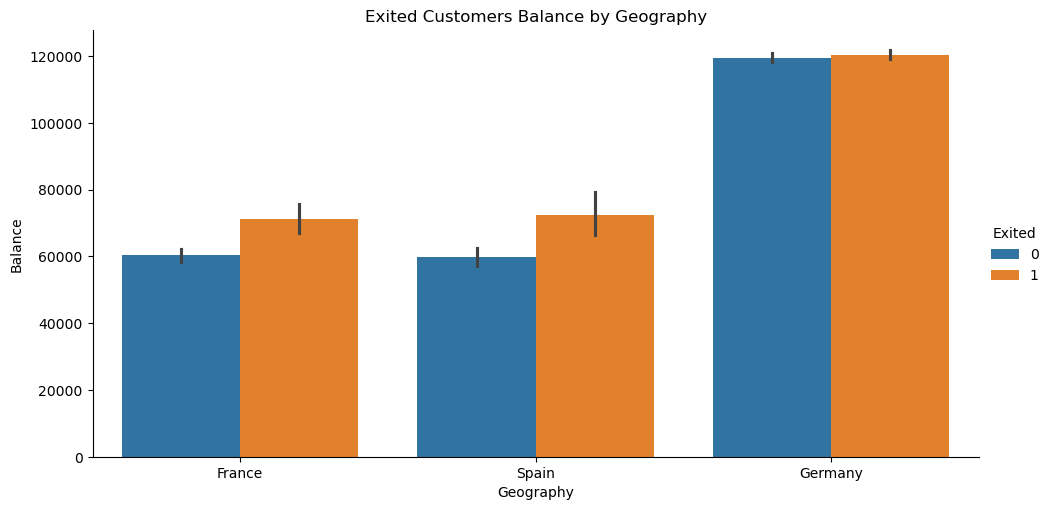

In [146]:
sb.catplot(x='Geography', y='Balance', hue='Exited', kind='bar', data=comb_df.sort_values(by='Balance'), height=5, aspect=2)
plt.title('Exited Customers Balance by Geography')
plt.show()

Exited customers balance is slightly higher compared to active customers across the three locations

##### Exited Customers Salary VS Geography

In [147]:
exit_cs = comb_df.groupby(['Geography', 'Exited'], as_index=False)['EstimatedSalary'].mean()
exit_cs = exit_cs.sort_values(by='EstimatedSalary', ascending=False)
exit_cs

,Geography,Exited,EstimatedSalary
5,Spain,1,103629.554818
1,France,1,103439.278296
2,Germany,0,102415.972651
0,France,0,99221.638506
4,Spain,0,98601.628914
3,Germany,1,98403.886450


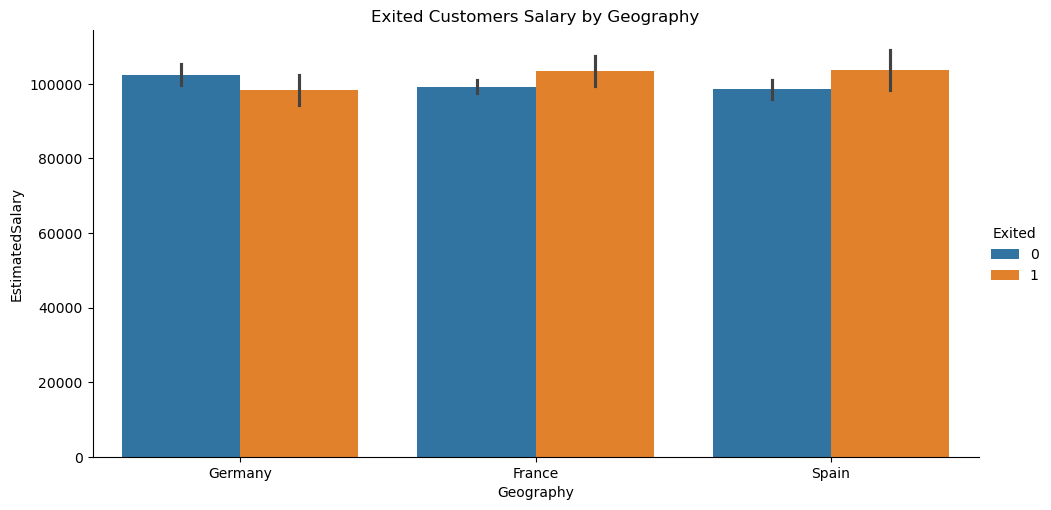

In [148]:
sb.catplot(x='Geography', y='EstimatedSalary', hue='Exited', kind='bar', data=comb_df.sort_values(by='EstimatedSalary'), height=5, aspect=2)
plt.title('Exited Customers Salary by Geography')
plt.show()

The estimated salary for active customers in Germany is higher than exited customers which is in contrast to other locations

##### Exited Customers Balance VS Gender

In [161]:
exited_cust = comb_df[comb_df['Exited'] == 1]
exited_cust

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScoreRating,SalaryRate,BalanceRate
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1,Fair,High-Income Customer,Zero Balance Customer
2,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1,Bad,High-Income Customer,Premium Customer
5,15574012,Chu,645,Spain,Male,44.0,149756.71,113755.78,2,No,8,No,1,Fair,High-Income Customer,High Balance Customer
7,15656148,Obinna,376,Germany,Female,29.0,119346.88,115046.74,4,No,4,No,1,Bad,High-Income Customer,High Balance Customer
16,15737452,Romeo,653,Germany,Male,58.0,5097.67,132602.88,1,No,1,No,1,Fair,Low-Income Customer,High Balance Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,15672754,Burbidge,498,Germany,Male,42.0,53445.17,152039.70,1,Yes,3,Yes,1,Bad,Average-Income Customer,Premium Customer
9979,15768163,Griffin,655,Germany,Female,46.0,115146.40,137145.12,1,No,7,No,1,Fair,High-Income Customer,High Balance Customer
9988,15769959,Ajuluchukwu,597,France,Female,53.0,69384.71,88381.21,1,No,4,No,1,Bad,Average-Income Customer,High Balance Customer
9994,15584532,Liu,709,France,Female,36.0,42085.58,0.00,1,Yes,7,Yes,1,Good,Low-Income Customer,Zero Balance Customer


In [163]:
exit_gender_count = exited_cust["Gender"].value_counts()
exit_gender_percent = exited_cust["Gender"].value_counts(normalize=True) * 100

In [166]:
exit_gender_count

Gender
Female    1139
Male       898
Name: count, dtype: int64

In [167]:
exit_gender_percent

Gender
Female    55.915562
Male      44.084438
Name: proportion, dtype: float64

In [149]:
exit_gender = comb_df.groupby(['Gender', 'Exited'], as_index=False)['Balance'].mean()
exit_gender = exit_gender.sort_values(by='Balance', ascending=False)
exit_gender

,Gender,Exited,Balance
3,Male,1,93736.483742
1,Female,1,89036.639359
2,Male,0,73901.453063
0,Female,0,71183.548601


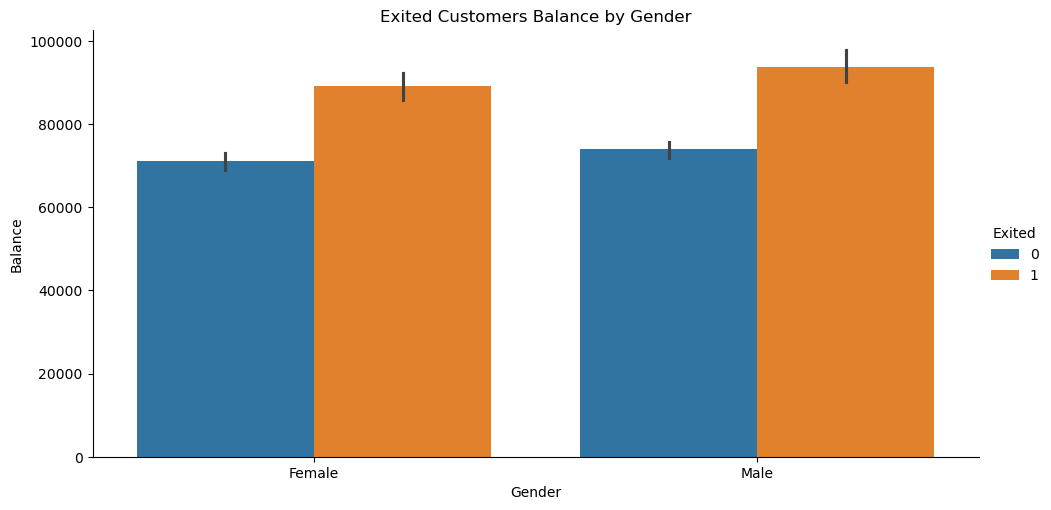

In [150]:
sb.catplot(x='Gender', y='Balance', hue='Exited', kind='bar', data=comb_df.sort_values(by='Balance'), height=5, aspect=2)
plt.title('Exited Customers Balance by Gender')
plt.show()

Exited customers had higher average balance than active customers among both male and female genders

#### 5. Customer Segmentation
- high-balance vs. low-balance customers

In [151]:
def cust_pattern(value):
    if value > 150000:
        return 'Premium Customer'
    elif value > 80000:
        return 'High Balance Customer'
    elif value > 0:
        return 'Low Balance Customer'
    else:
        return 'Zero Balance Customer'

comb_df['BalanceRate'] = comb_df['Balance'].apply(cust_pattern)

In [152]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,CreditScoreRating,SalaryRate,BalanceRate
0,15634602,Hargrave,619,France,Female,42.0,101348.88,0.00,1,Yes,2,Yes,1,Fair,High-Income Customer,Zero Balance Customer
1,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0,Fair,High-Income Customer,High Balance Customer
2,15619304,Onio,502,France,Female,42.0,113931.57,159660.80,3,No,8,No,1,Bad,High-Income Customer,Premium Customer
3,15701354,Boni,699,France,Female,39.0,93826.63,0.00,2,No,1,No,0,Good,Average-Income Customer,Zero Balance Customer
4,15737888,Mitchell,850,Spain,Female,43.0,79084.10,125510.82,1,Yes,2,Yes,0,Excellent,Average-Income Customer,High Balance Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,Obijiaku,771,France,Male,39.0,96270.64,0.00,2,No,5,No,0,Good,Average-Income Customer,Zero Balance Customer
9993,15569892,Johnstone,516,France,Male,35.0,101699.77,57369.61,1,Yes,10,Yes,0,Bad,High-Income Customer,Low Balance Customer
9994,15584532,Liu,709,France,Female,36.0,42085.58,0.00,1,Yes,7,Yes,1,Good,Low-Income Customer,Zero Balance Customer
9995,15682355,Sabbatini,772,Germany,Male,42.0,92888.52,75075.31,2,No,3,No,1,Good,Average-Income Customer,Low Balance Customer


In [153]:
bal_rate = comb_df.groupby('BalanceRate')[['Balance']].count()
bal_rate = bal_rate.sort_values(by='Balance', ascending=False)
bal_rate

,Balance
BalanceRate,
High Balance Customer,4827
Zero Balance Customer,3616
Premium Customer,969
Low Balance Customer,585


In [154]:
bal_rate['Balance Percent'] = (bal_rate['Balance'] /sum(bal_rate['Balance'])) * 100

bal_rate

,Balance,Balance Percent
BalanceRate,,
High Balance Customer,4827,48.284485
Zero Balance Customer,3616,36.170851
Premium Customer,969,9.692908
Low Balance Customer,585,5.851756


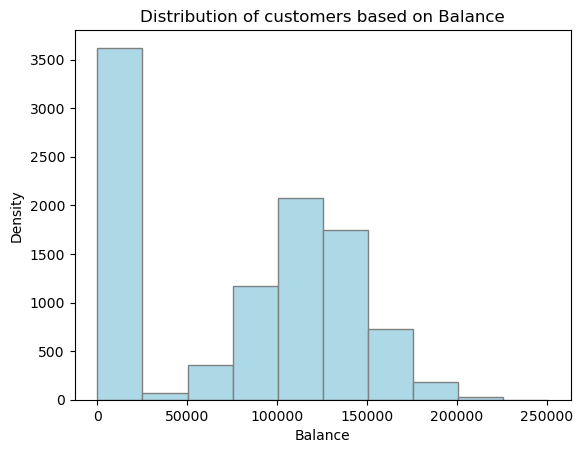

In [155]:
draw_hist(comb_df, 'Balance')

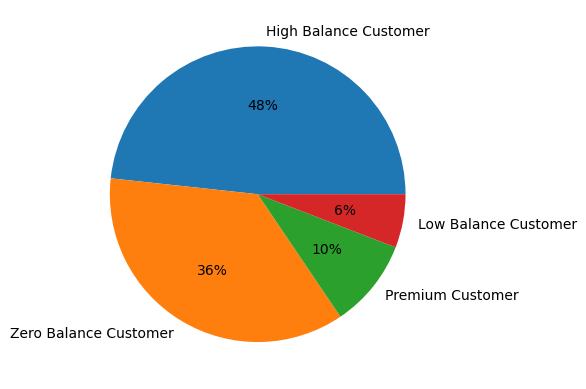

In [156]:
plt.pie(bal_rate['Balance'], labels=bal_rate.index, autopct='%.0f%%')
plt.show()

Result: 
- The analysis shows that 48% of customers are high-balance individuals, with average balances ranging between 80,000 and 150,000
- In contrast, 36% of customers have a zero balance

##### Balance vs Geography

In [157]:
bal_geo = comb_df.groupby(['Geography', 'BalanceRate'], as_index=False)['Balance'].count()

bal_geo

,Geography,BalanceRate,Balance
0,France,High Balance Customer,1895
1,France,Low Balance Customer,269
2,France,Premium Customer,432
3,France,Zero Balance Customer,2417
4,Germany,High Balance Customer,2012
5,Germany,Low Balance Customer,182
6,Germany,Premium Customer,314
7,Spain,High Balance Customer,920
8,Spain,Low Balance Customer,134
9,Spain,Premium Customer,223


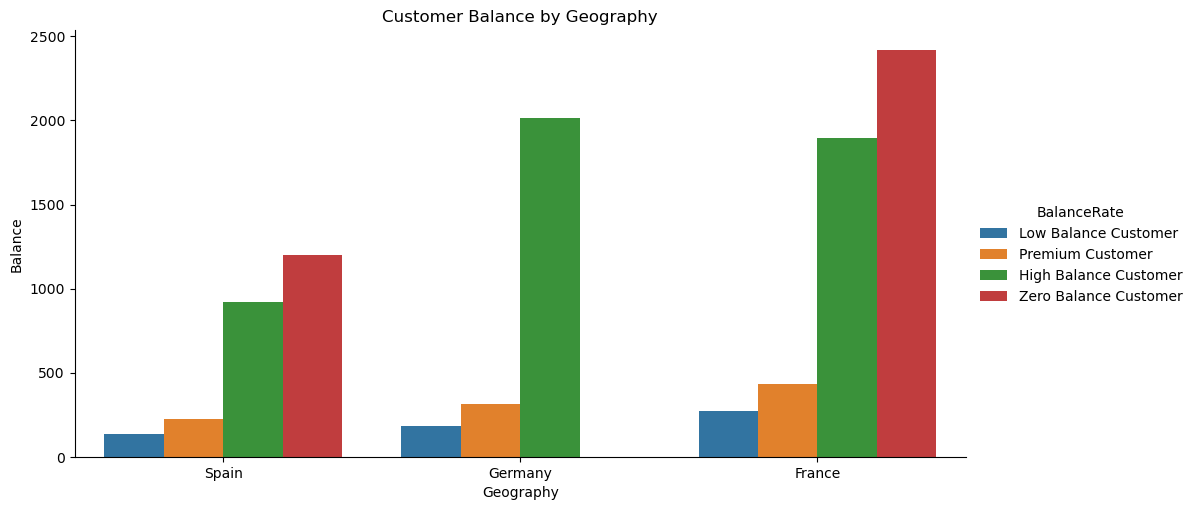

In [158]:
sb.catplot(x='Geography', y='Balance', hue='BalanceRate', kind='bar', data=bal_geo.sort_values(by='Balance'), height=5, aspect=2)
plt.title('Customer Balance by Geography')
plt.show()

Result:
- Zero-balance customers are mostly concentrated in France, while Germany has none. 
- Germany also has the highest proportion of high-balance customers, whereas Spain shows the lowest distribution.
- Additionally, the rate of premium customers is low across all regions

##### Balance vs Gender

In [159]:
gen_geo = comb_df.groupby(['Gender', 'BalanceRate'], as_index=False)['Balance'].count()

gen_geo

,Gender,BalanceRate,Balance
0,Female,High Balance Customer,2189
1,Female,Low Balance Customer,275
2,Female,Premium Customer,424
3,Female,Zero Balance Customer,1653
4,Male,High Balance Customer,2638
5,Male,Low Balance Customer,310
6,Male,Premium Customer,545
7,Male,Zero Balance Customer,1963


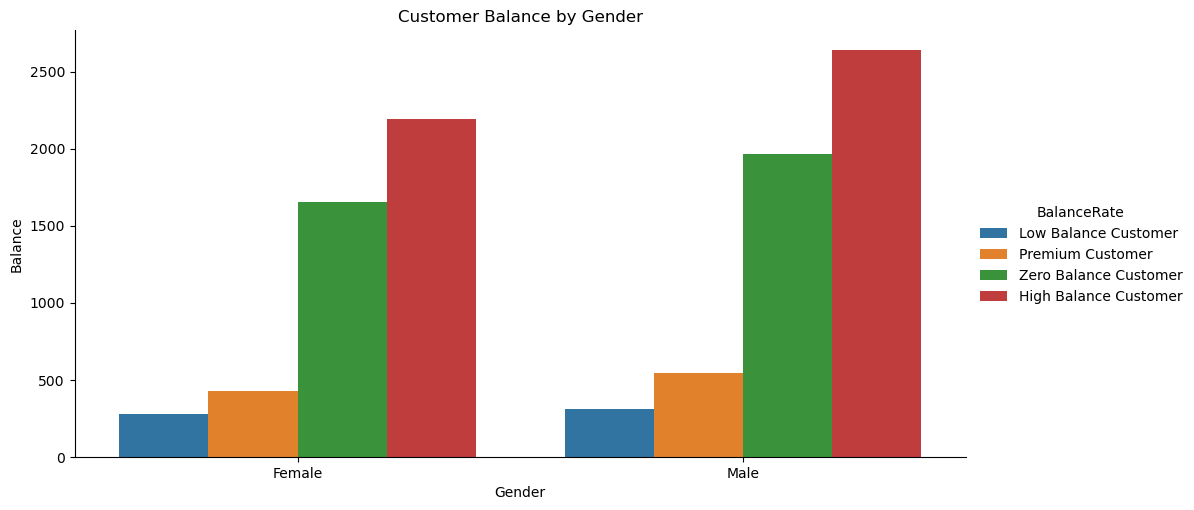

In [160]:
sb.catplot(x='Gender', y='Balance', hue='BalanceRate', kind='bar', data=gen_geo.sort_values(by='Balance'), height=5, aspect=2)
plt.title('Customer Balance by Gender')
plt.show()

### Analysis
##### Geographical Distribution
- France had the highest number of customers (about 50%)
- Germany and Spain had a smaller share

##### Credit Score Trends
- Most customers have credit scores between 650–700
- Only a few customers fall in the Excellent range (781–850)
- France has the highest number of customers across all credit score categories

##### Gender-Based Insights
- Males have slightly higher credit scores and estimated salaries compared to females
- The proportion of high-balance and zero-balance customers is also slightly higher among males

##### Balance Distribution
- 48% of customers are high-balance individuals, with average balances between 80,000–150,000
- 36% of customers have zero balances
- Zero-balance customers are mostly found in France, while Germany has none
- Germany has the highest number of high-balance customers, and Spain the least.

##### Tenure & Financial Behavior
- Customers with 1-year tenure have the highest average balance, followed by a decline and gradual rise until year 10.
- Tenure does not show a strong correlation with balance, product ownership, or credit score.
- Tenure 1 customers own the most products, credit cards, and show the highest activity.

##### Customer Type
- The proportion of premium customers is low across all regions.

### Key Insights
- Credit score and balance are not strongly dependent on tenure.

- Male customers slightly outperform females in salary and financial metrics.

- France dominates in customer volume, but also holds the highest share of zero-balance individuals.

- Germany appears to host the most financially healthy customers, especially high-balance individuals.

- A large segment of customers maintain high balances, suggesting potential for cross-sell opportunities.

### Recommendations
- Target high-balance customers in Germany for premium services and investment products.

- Develop strategies to engage zero-balance customers in France, possibly through onboarding financial products or improving credit accessibility.

- Promote financial products more actively to shorter-tenure customers, who show higher activity and product ownership.

- Consider gender-tailored offerings, as financial behavior slightly varies between male and female customers.

- Re-evaluate premium customer criteria or promotion strategy due to the consistently low adoption across regions.

### Conclusion
This analysis provided valuable insights into customer behavior across geography, gender, tenure, and financial metrics. The findings highlight key areas for strategic focus, especially in terms of customer targeting and engagement. By leveraging these insights, financial institutions can better align their services with customer needs and drive growth through smarter segmentation.